# Описание проекта
**Цель проекта**:выявить определяющие успешность игры закономерности.    
**Выборка**:исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.   
**Замечание**:ESRB - возрастная категория игры.   

# ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ

**Описание данных**  
•	Name — название игры  
•	Platform — платформа  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)  
•	EU_sales — продажи в Европе (миллионы проданных копий)  
•	JP_sales — продажи в Японии (миллионы проданных копий)  
•	Other_sales — продажи в других странах (миллионы проданных копий)  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг   компьютерных игр и присваивает им подходящую возрастную категорию.  

Загрузим данные и необходимые библиотеки

In [ ]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import display
try:
    df_games=pd.read_csv('games.csv', sep=',')
except:
    df_games=pd.read_csv('datasets/games.csv', sep=',')

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
display(df_games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия столбцов к нижнему регистру

In [ ]:
df_games.columns = map(str.lower, df_games.columns)
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Изменим тип данных в столбце User_Score, так как в нем содержаться числовые данные

In [ ]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
print(df_games['user_score'].dtype)

float64


Изменим тип данных в столбце year_of_release, так как год является целым числом

In [ ]:
df_games['year_of_release'] =df_games['year_of_release'].astype('Int64')
print(df_games['name'])

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16715, dtype: object


In [ ]:
display(df_games.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,nan,nan,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,nan,nan,NaN


### Вывод 1

1. Датафрейм состоит из 10 столбцов и 16715 строк
2. В 6 столбцах присутствуют пропуски, причем в столбцах Critic_Score, User_Score и Rating их около половины
3. Данные в столбцах относятся как типы object, так и к типам float и integer

# ПРЕДОБРАБОТКА ДАННЫХ

Проверим данные на наличие дубликатов

In [ ]:
print("Количество дубликатов:", df_games.duplicated().sum())

Количество дубликатов: 0


Проверим данные на наличие не явных дубликатов

In [ ]:
#создадим список со значениями столбцов типа object

columns=[df_games['name'],df_games['platform'], df_games['genre'], df_games['rating']]

#распечатаем уникальные значения для этих столбцов

for i in columns:
    display('Уникальные значения столбца', i.unique())


'Уникальные значения столбца'

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'Уникальные значения столбца'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'Уникальные значения столбца'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'Уникальные значения столбца'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Обработка пропусков

Пропуски в столбце **year_of_release** оставляем не заполненными, так эти данные не понадобятся для дальнейшего анализа

Отработатаем пропуски в столбце **сritic_score**     

In [ ]:
print(df_games['user_score'].isna().sum())
print(df_games['critic_score'].isna().sum())

9125
8578


Для замены пропущенных значений в столбцах **сritic_score** и **user_score** сравним насколько сильно отличаются оценки
критиков и игроков

In [ ]:
# выведем описательную статистику для обоих столбцов
print(df_games['critic_score'].describe())
print()
print(df_games['user_score'].describe())

count   8137.00
mean      68.97
std       13.94
min       13.00
25%       60.00
50%       71.00
75%       79.00
max       98.00
Name: critic_score, dtype: float64

count   7590.00
mean       7.13
std        1.50
min        0.00
25%        6.40
50%        7.50
75%        8.20
max        9.70
Name: user_score, dtype: float64


**промежуточный вывод**: оценки критиков и игроков довольно близки, при этом разброс значений у критиков в среднем выше чем у
игроков, а сами значения в среднем ниже.

Выведем медианные пользовательские значения по жанрам и платформам

In [ ]:
df_games_rating_user_score_median=df_games.pivot_table(index='genre', values='user_score', aggfunc='median').reset_index()
display(df_games_rating_user_score_median)

df_games_rating_user_score_median_platform=df_games.pivot_table(index='platform', values='user_score', aggfunc='median').reset_index()
display(df_games_rating_user_score_median_platform)

,genre,user_score
0,Action,7.40
1,Adventure,7.60
2,Fighting,7.60
3,Misc,7.10
4,Platform,7.70
5,Puzzle,7.50
6,Racing,7.40
7,Role-Playing,7.80
8,Shooter,7.40
9,Simulation,7.50


,platform,user_score
0,3DS,7.10
1,DC,8.80
2,DS,7.40
3,GBA,8.00
4,GC,7.95
5,PC,7.50
6,PS,8.30
7,PS2,8.00
8,PS3,7.10
9,PS4,7.00


Медианныне значения пользовательских оценок не сильно зависят от жанра, но достаточно сильно зависят от платформы, поэтому разумно заменить пропуски медианными значениями по платформе

In [ ]:
df_games_rating_user_median= dict(df_games.pivot_table(index='genre', values='user_score', aggfunc='median')['user_score'])
print(df_games_rating_user_median)

df_games['user_score']=df_games['user_score'].fillna(df_games['genre'].map(df_games_rating_user_median))

display(df_games['user_score'])

{'Action': 7.4, 'Adventure': 7.6, 'Fighting': 7.6, 'Misc': 7.1, 'Platform': 7.7, 'Puzzle': 7.5, 'Racing': 7.4, 'Role-Playing': 7.8, 'Shooter': 7.4, 'Simulation': 7.5, 'Sports': 7.4, 'Strategy': 7.8}


0       8.00
1       7.70
2       8.30
3       8.00
4       7.80
        ... 
16710   7.40
16711   7.40
16712   7.60
16713   7.70
16714   7.50
Name: user_score, Length: 16715, dtype: float64

Выведем медианные оценки критиков по жанрам и платформам

In [ ]:
df_games_crirtic_user_score_median=df_games.pivot_table(index='genre', values='critic_score', aggfunc='median').reset_index()
display(df_games_crirtic_user_score_median)

df_games_crirtic_user_score_median_platform=df_games.pivot_table(index='platform', values='critic_score', aggfunc='median').reset_index()
display(df_games_crirtic_user_score_median_platform)

,genre,critic_score
0,Action,68.00
1,Adventure,66.00
2,Fighting,72.00
3,Misc,69.00
4,Platform,69.00
5,Puzzle,70.00
6,Racing,69.00
7,Role-Playing,74.00
8,Shooter,73.00
9,Simulation,70.00


,platform,critic_score
0,3DS,68.00
1,DC,88.00
2,DS,66.00
3,GBA,69.00
4,GC,70.00
5,PC,78.00
6,PS,73.50
7,PS2,70.00
8,PS3,73.00
9,PS4,73.00


Медианные оценки критиков также не сильно зависят от жанра, но значительно зависят от платформы, поэтому заменим пропуски медианным значением по платформам

In [ ]:
df_games_rating_critic_median=dict(df_games.pivot_table(index='genre', values='critic_score', aggfunc='median')['critic_score'])
print(df_games_rating_critic_median)

df_games['critic_score']=df_games['critic_score'].fillna(df_games['genre'].map(df_games_rating_critic_median))

display(df_games['critic_score'])

{'Action': 68.0, 'Adventure': 66.0, 'Fighting': 72.0, 'Misc': 69.0, 'Platform': 69.0, 'Puzzle': 70.0, 'Racing': 69.0, 'Role-Playing': 74.0, 'Shooter': 73.0, 'Simulation': 70.0, 'Sports': 75.0, 'Strategy': 73.0}


0       76.00
1       69.00
2       82.00
3       80.00
4       74.00
         ... 
16710   68.00
16711   75.00
16712   66.00
16713   69.00
16714   70.00
Name: critic_score, Length: 16715, dtype: float64

Проверим количество оставшихся пропусков

In [ ]:
print(df_games['user_score'].isna().sum())
print(df_games['critic_score'].isna().sum())

2
2


**Промежуточный вывод** Рейтинги больше зависят от платформы, чем от жанра, поэтому пропуски в оценках лучше заменить медианными значениями по платформе. Пропуски в столбцах с оценками могли появится из-за того, что игры выходят на разных платформах, часто с лагом по времени. Соответсвенно оценка появляется у игры только на той платформе на которой она вышла первой. Также игра может быть новой и у нее еще нету оценок.

Обработаем пропуски в столбцах с рейтингом

In [ ]:
df_games['rating']=df_games['rating'].fillna('no_data')

df_games_raiting=df_games.query('rating=="no_data"')['year_of_release']
print(df_games_raiting.describe())
print(df_games['year_of_release'].describe())

count   6678.00
mean    2004.88
std        7.49
min     1980.00
25%     1999.00
50%     2007.00
75%     2011.00
max     2016.00
Name: year_of_release, dtype: float64
count   16446.00
mean     2006.48
std         5.88
min      1980.00
25%      2003.00
50%      2007.00
75%      2010.00
max      2016.00
Name: year_of_release, dtype: float64


**Промежуточный вывод** :изначально я предположил, что рейтинга нету у старых игр, когда он еще не ставился, но гипотеза не
потвердилась так статистика по году выхода игр без рейтинга и с рейтингом практически не отличается, так как других гипотез по замене у меня нету, то заменю эти значения просто на "no_data"

**Посчитаем суммарные продажи во всех регионах**

In [ ]:
df_games['sum_sales']=df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']

# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

Выведем гистограмму по количеству выпускаемых игр в разные годы

Text(0.5, 0, 'Год')

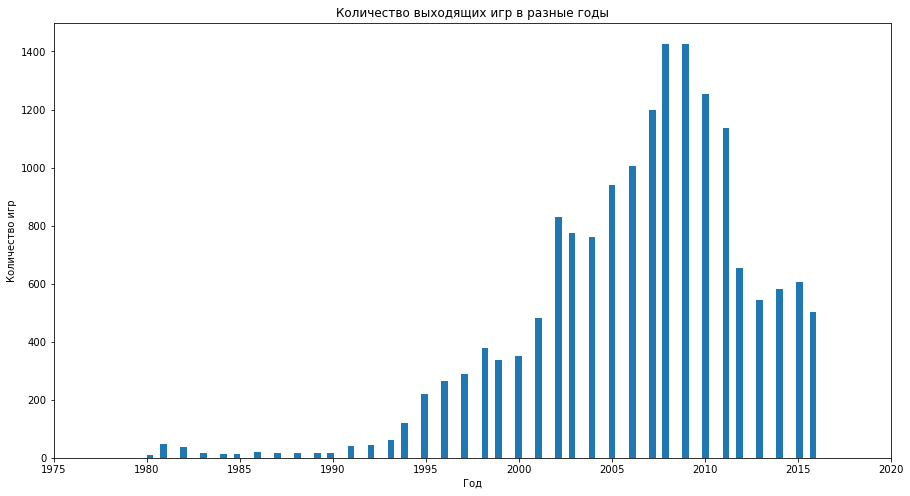

In [ ]:
df_games['year_of_release'].plot(title='Количество выходящих игр в разные годы', kind='hist', bins=100, figsize=(15,8))
plt.xlim(1975, 2020)
plt.ylabel("Количество игр")
plt.xlabel("Год")


Количество выходящих игр неравномерно до 1995 года игр выходило совсем мало, затем шел постепенный рост с максимумом
в 2005-2010 годах и резкое снижение количества выходящих игр в 2012-2015 годах. Наиболее рационально расcматривать период
с 2012 по 2015 годы.

In [ ]:
display(df_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.00,7.70,no_data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.00,7.80,no_data,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.00,7.40,no_data,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.00,7.40,no_data,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.00,7.60,no_data,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.00,7.70,no_data,0.01


In [ ]:
df_games_sale_platform=df_games.pivot_table(index='platform', values="sum_sales", aggfunc='sum')
display(df_games_sale_platform['sum_sales'].sort_values(ascending=False))

platform
PS2    1255.77
X360    971.42
PS3     939.65
Wii     907.51
DS      806.12
PS      730.86
GBA     317.85
PS4     314.14
PSP     294.05
PC      259.52
3DS     259.00
XB      257.74
GB      255.46
NES     251.05
N64     218.68
SNES    200.04
GC      198.93
XOne    159.32
2600     96.98
WiiU     82.19
PSV      54.07
SAT      33.59
GEN      30.77
DC       15.95
SCD       1.86
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
Name: sum_sales, dtype: float64

Построим распределение продаж по годам для 10 платформ с наибольшими суммарными продажами

In [ ]:
#создадим срез данных с этими платформами
platforms_big_sales=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
df_games_platforms=df_games.query('platform==@platforms_big_sales')
display(df_games_platforms)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,69.00,7.70,no_data,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69.00,7.40,no_data,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.00,7.40,no_data,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.00,7.40,no_data,0.01


Построим распределение продаж по годам для каждой платформы

In [ ]:
df_games_platforms_sales=df_games_platforms.pivot_table(index=['platform', 'year_of_release']
                        , values='sum_sales', aggfunc='sum')
display(df_games_platforms_sales)

sum_sales
platform year_of_release           
DS       1985                  0.02
         2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
...                             ...
X360     2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52

[117 rows x 1 columns]

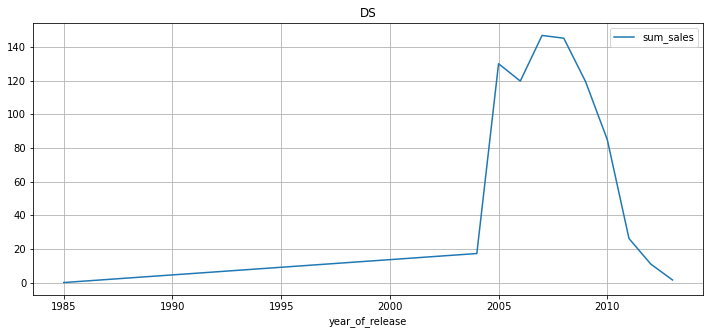

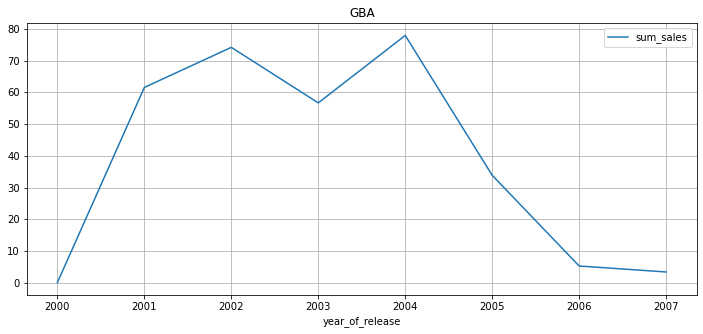

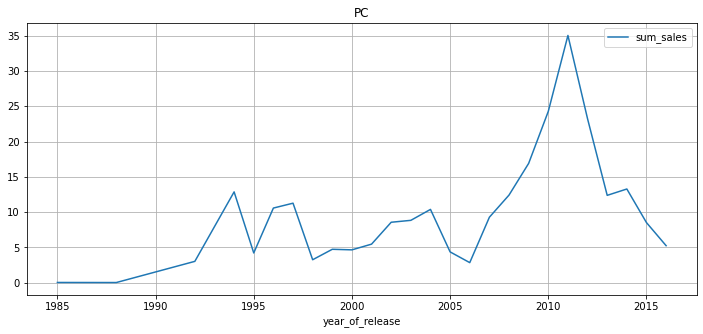

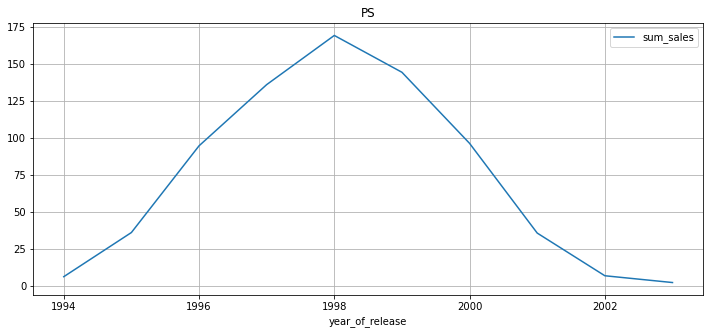

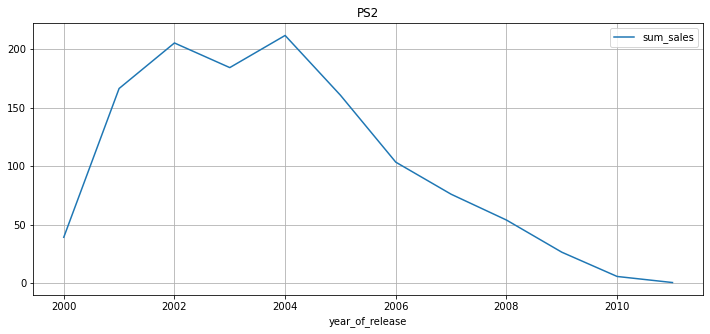

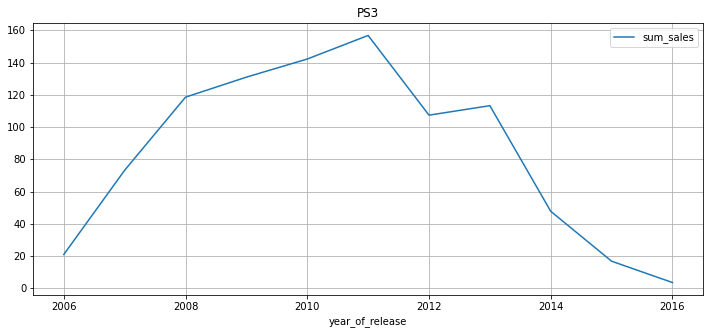

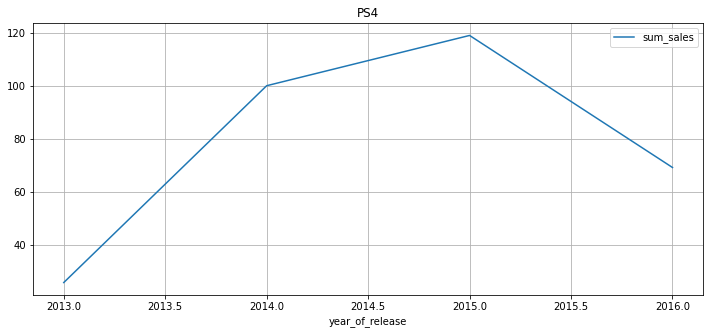

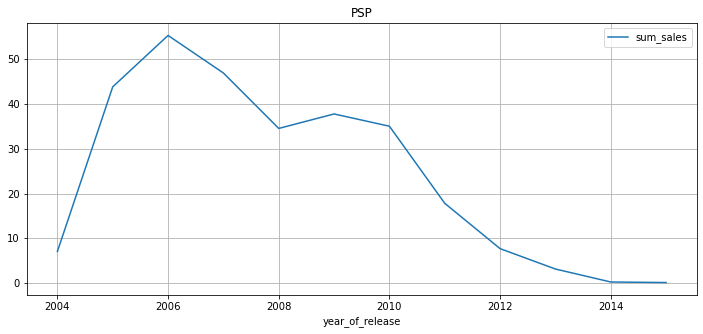

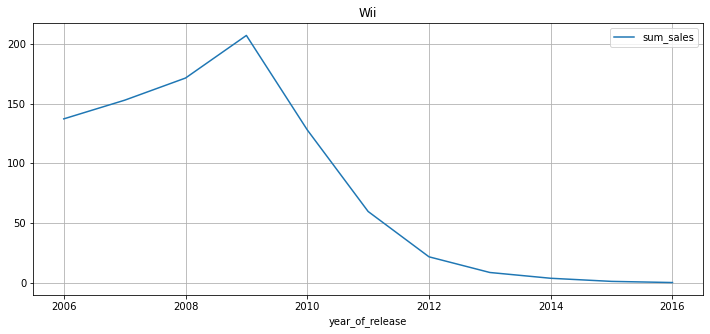

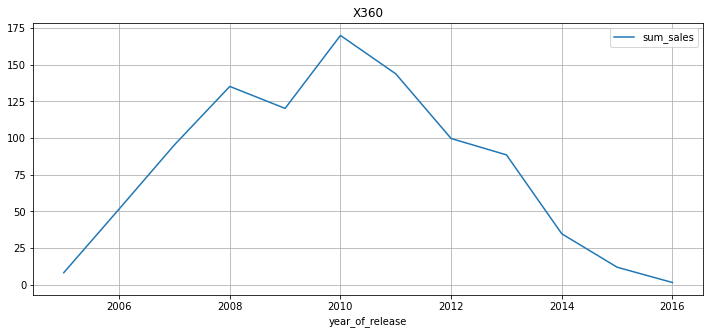

In [ ]:
platforms=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

df_games_platforms_sales_TOP_5=df_games_platforms_sales.query('platform == @platforms').reset_index()

for platform, group_data in df_games_platforms_sales_TOP_5.groupby('platform'):
    group_data.plot(y='sum_sales', x='year_of_release', title=platform, grid=True, figsize=(12, 5))

**Промежуточный вывод** Можно сказать что "средний срок популярности" платфомы 8-10 лет.


Построим распределение по продажам за 2012-2016 года

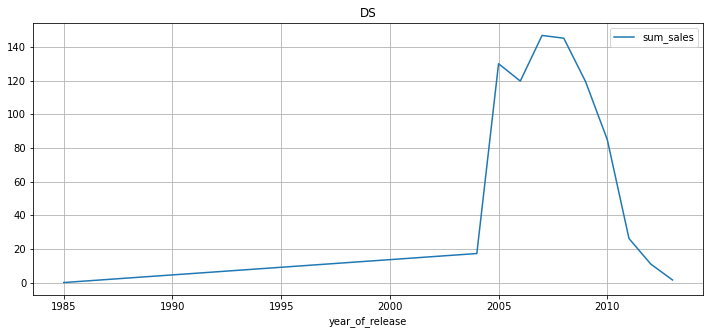

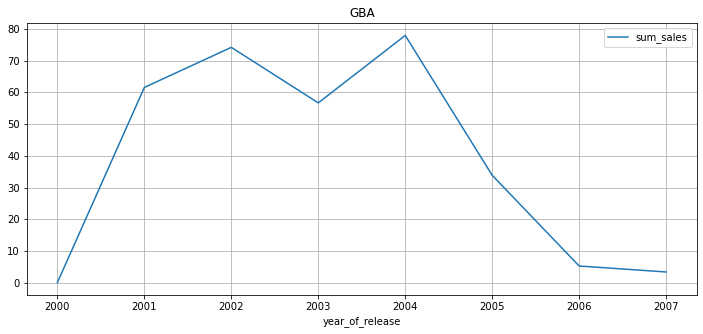

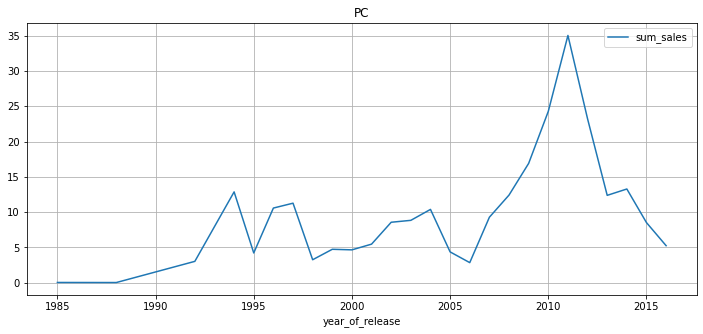

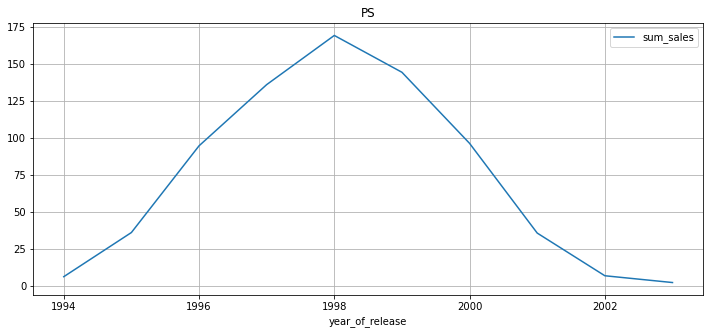

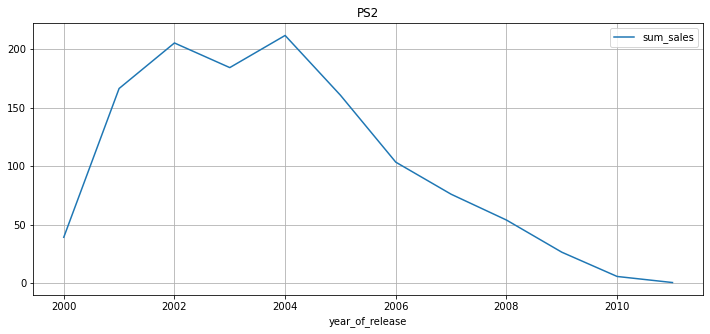

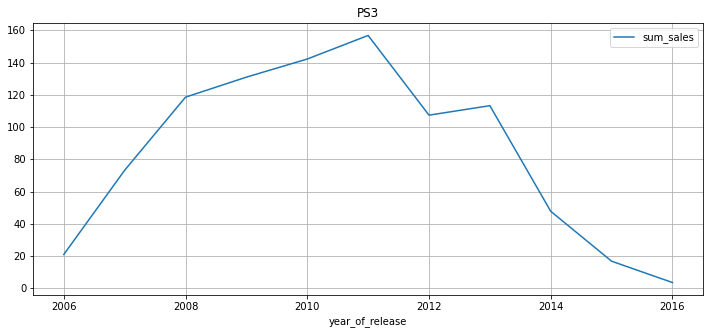

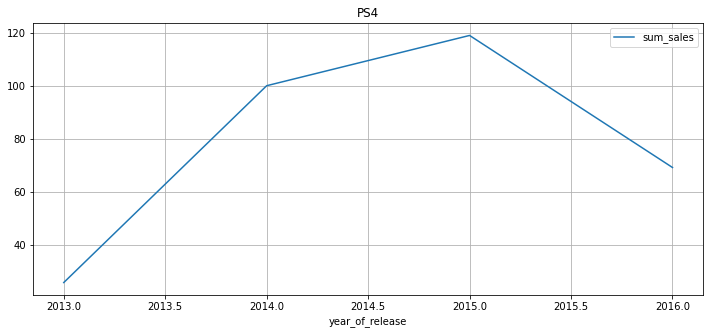

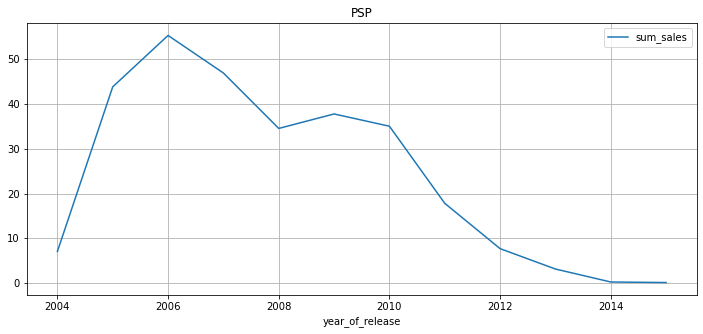

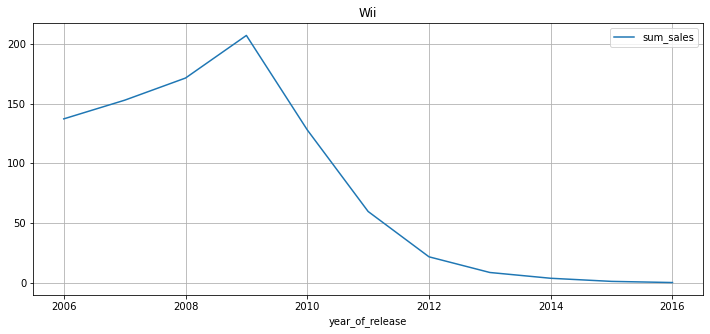

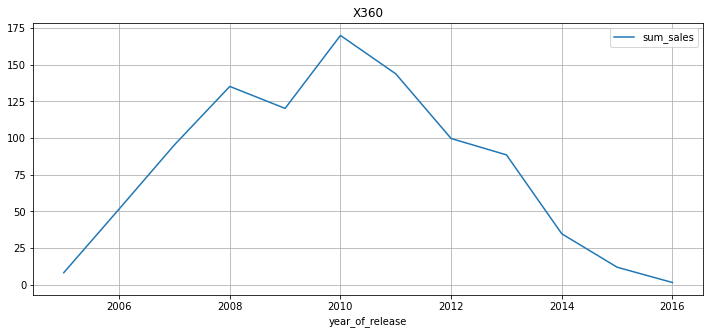

In [ ]:
platforms=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
df_games_platforms_sales_TOP_5=df_games_platforms_sales.query('platform == @platforms').reset_index()

for platform, group_data in df_games_platforms_sales_TOP_5.groupby('platform'):
    group_data.plot(y='sum_sales', x='year_of_release', title=platform, grid=True, figsize=(12, 5))


**Промежуточный вывод** По наиболее актуальным данным за период 2012-2016 годам наиболее перспективными с точки зрения продаж
платформами являются PS4, PS3, X360 и PC. При этом у всех остальных платформ продажи упали к 2015 практически до 0.
Кроме того у этих платформ продажи также упали по сравнению с 2010-ым в 2 раза. Похоже рынок компьютерных игр переживает не лучшие времена. Видимо все сидят в онлайн играх и на телефонах

### Построим "ящик с усами" по продажам каждой платформы

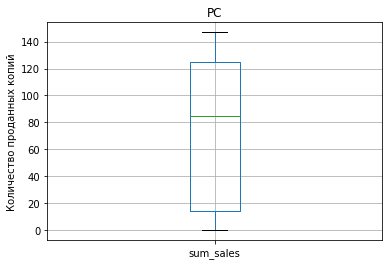

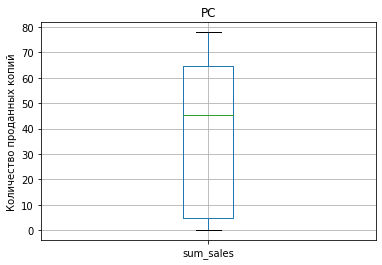

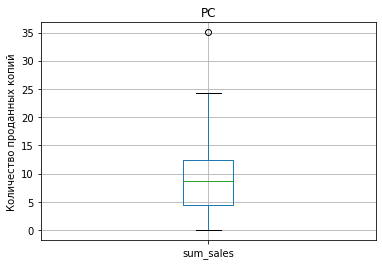

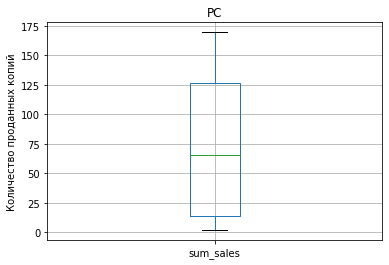

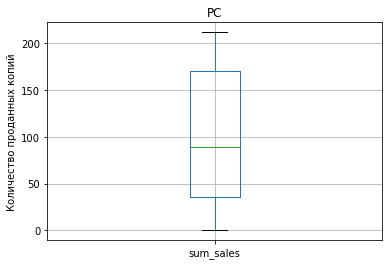

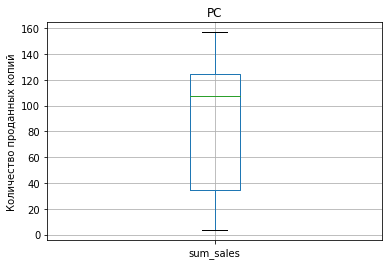

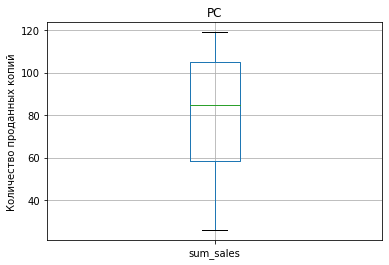

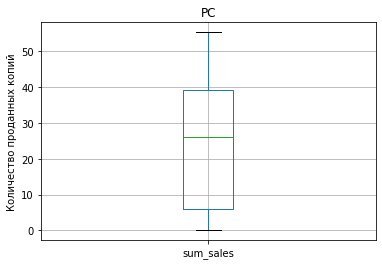

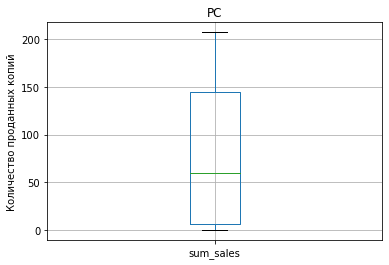

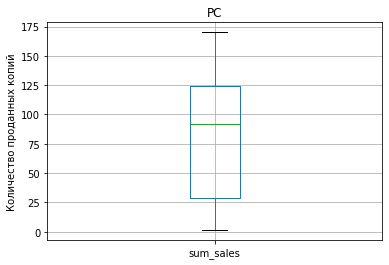

<Figure size 432x288 with 0 Axes>

In [ ]:
platforms=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
df_games_platforms_sales_TOP_5=df_games_platforms_sales.query('platform == @platforms').reset_index()

for platform, group_data in df_games_platforms_sales_TOP_5.groupby('platform'):
    group_data.boxplot('sum_sales')
    plt.title('PC')
    plt.ylabel("Количество проданных копий")
    plt.figure()

**Промежуточный вывод** Разброс по количеству проданных копий довольно высок до 100 млн копий в год.
При этом у PC наименьшее количество проданных копий, а наиболее стабильыне продажи у PS2, PS3 и PS4

### Иссследуем влияние на продажи отзывов критиков и пользователей

In [ ]:
df_games_platforms_PC=df_games.query('platform == "PS2"')
display(df_games_platforms_PC)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.00,9.00,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.00,8.70,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.00,8.40,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.00,8.50,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.00,8.50,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.00,7.60,no_data,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.00,7.60,no_data,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.00,7.60,no_data,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.00,7.60,no_data,0.01


In [ ]:
print(df_games_platforms_PC['user_score'].corr(df_games_platforms_PC['sum_sales']))
print(df_games_platforms_PC['critic_score'].corr(df_games_platforms_PC['sum_sales']))

0.17441948322829434
0.3527025918647363


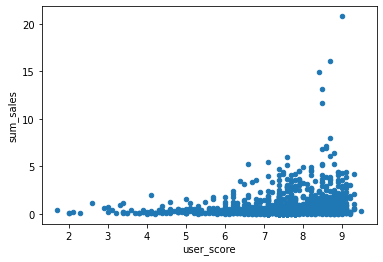

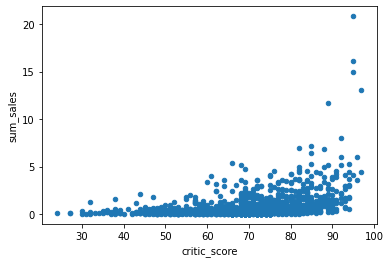

In [ ]:
df_games_platforms_PC.plot(x='user_score', y='sum_sales', kind='scatter')
df_games_platforms_PC.plot(x='critic_score', y='sum_sales', kind='scatter')

Посмотрим влияние платформы на продажи игр

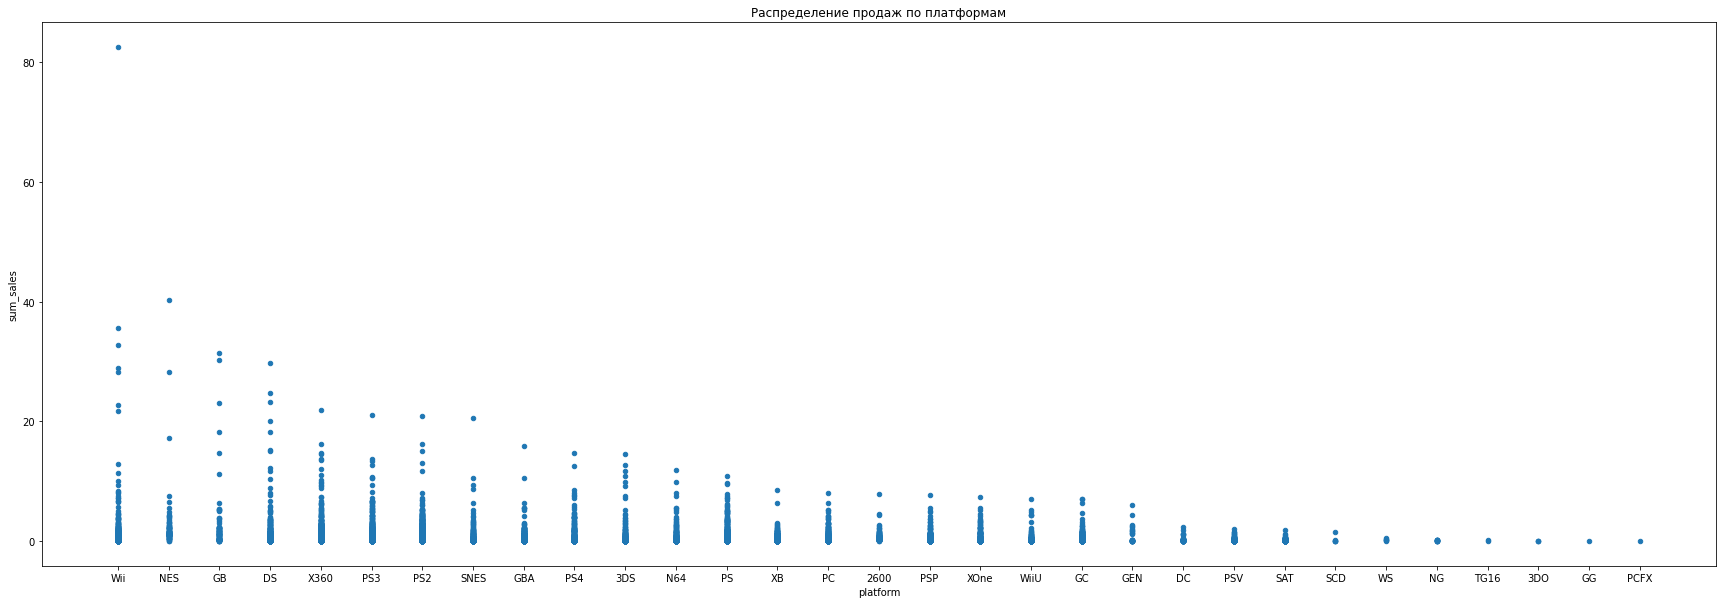

In [ ]:
df_games.plot(x='platform', y='sum_sales', kind='scatter', title='Распределение продаж по платформам',figsize=(30, 10))

,genre,sum_sales
0,Action,0.19
1,Adventure,0.05
2,Fighting,0.21
3,Misc,0.16
4,Platform,0.27
5,Puzzle,0.11
6,Racing,0.19
7,Role-Playing,0.18
8,Shooter,0.24
9,Simulation,0.15


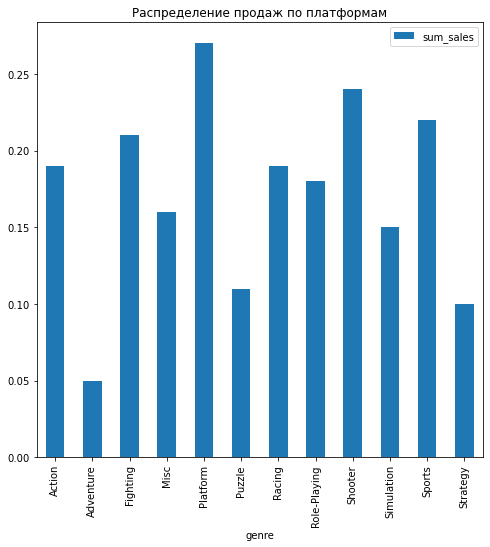

In [ ]:
df_games_genre=df_games.pivot_table(index='genre', values='sum_sales', aggfunc='median').reset_index()
display(df_games_genre)
df_games_genre.plot(x='genre', y='sum_sales', kind='bar', title='Распределение продаж по платформам',figsize=(8, 8))

**Промежуточный вывод**
* Количество продаж не сильно коррелириует с мнением критиков и пользователей. При этом мнение критиков более чем в 2 раза сильнее влияет на продажи, чем мнение пользоваталей. Продажи игр с очень высоким рейтингами в 2-4 раза отличаются от продаж игр с низким рейтингом.
* Платформа влияет на продажи игры. Лучше всего продаются игры выходящие на платформах Wii, NES, GB, DS и X360
* Зависимость количества продаж от жанра игры присутвует. Лучше всего продаются игры в жанрах Shooter, Sports, Fighting и Action. Хуже всего Adventure и Strategy

# ИЗУЧИМ ПРЕДПОЧТЕНИЯ ПОЛЬЗОВАТЕЛЕЙ РАЗНЫХ РЕГИОНОВ

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Определим **ТОП-5** популярных платформ для пользователей разных регионов

platform
X360   602.47
PS2    583.84
Wii    496.90
PS3    393.49
DS     382.40
Name: na_sales, dtype: float64

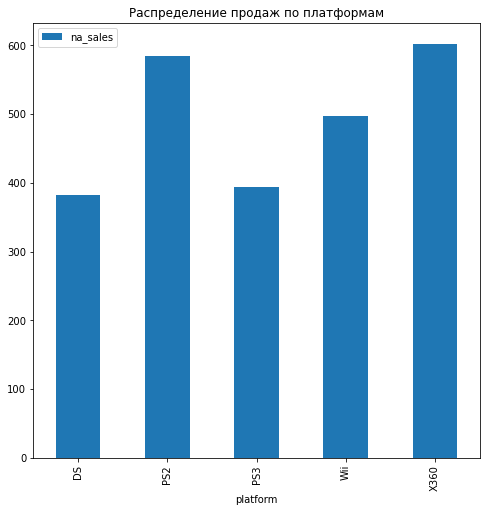

In [ ]:
df_games_sale_platform_NA=df_games.pivot_table(index='platform', values="na_sales", aggfunc='sum')
display(df_games_sale_platform_NA['na_sales'].sort_values(ascending=False).head(5))
TOP_NA=['X360', 'PS2', 'Wii', 'PS3', 'DS']
df_games_sale_platform_NA_TOP_5=df_games_sale_platform_NA.query('platform==@TOP_NA').reset_index()
df_games_sale_platform_NA_TOP_5.plot(x='platform', y='na_sales', kind='bar'\
            , title='Распределение продаж по платформам',figsize=(8, 8))

platform
PS2    339.29
PS3    330.29
X360   270.76
Wii    262.21
PS     213.61
Name: eu_sales, dtype: float64

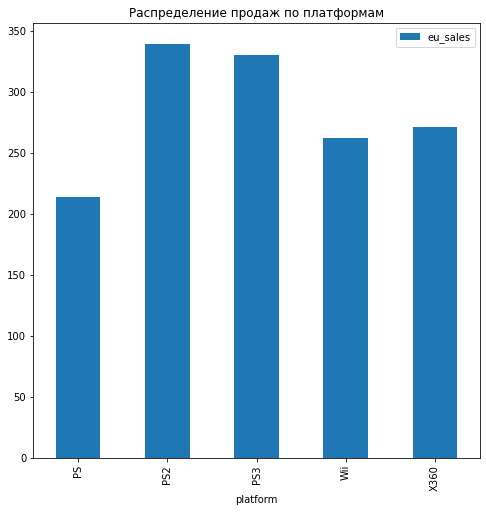

In [ ]:
df_games_sale_platform_EU=df_games.pivot_table(index='platform', values="eu_sales", aggfunc='sum')
display(df_games_sale_platform_EU['eu_sales'].sort_values(ascending=False).head(5))
TOP_EU=['PS2', 'PS3', 'X360', 'Wii', 'PS']
df_games_sale_platform_EU_TOP_5=df_games_sale_platform_EU.query('platform==@TOP_EU').reset_index()
df_games_sale_platform_EU_TOP_5.plot(x='platform', y='eu_sales', kind='bar'\
            , title='Распределение продаж по платформам',figsize=(8, 8))

platform
DS     175.57
PS     139.82
PS2    139.20
SNES   116.55
3DS    100.67
Name: jp_sales, dtype: float64

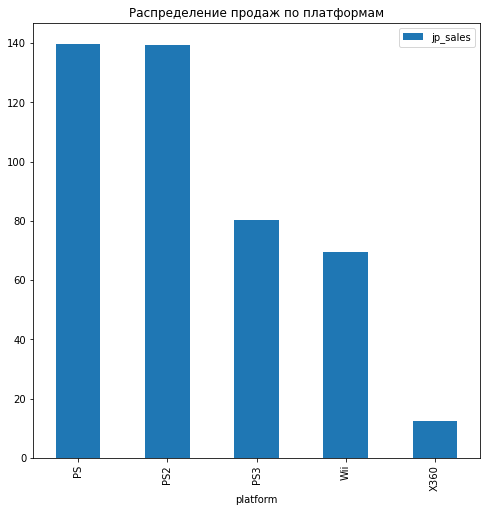

In [ ]:
df_games_sale_platform_JP=df_games.pivot_table(index='platform', values="jp_sales", aggfunc='sum')
display(df_games_sale_platform_JP['jp_sales'].sort_values(ascending=False).head(5))
TOP_JP=['PS', 'PS2', 'PS3', 'Wii', 'X360']
df_games_sale_platform_JP_TOP_5=df_games_sale_platform_JP.query('platform==@TOP_JP').reset_index()
df_games_sale_platform_JP_TOP_5.plot(x='platform', y='jp_sales', kind='bar'\
            , title='Распределение продаж по платформам',figsize=(8, 8))

Создадим функцию для построения гистраграмм продаж

**Промежуточный вывод**
* Больше всего игр продается в Северной Америке на втором месте Европа, а потом Япония.
* Самые популярные платформы в Америке - X360 и PS2. Самая непопулярная - DS.
* Самые популярные платформы в Европе-  PS2 и PS3. Самая непопулярная - PS.
* Самые популярные платформы в Японии-  PS и PS2. Самая непопулярная - X360.
* Различия в попцлярности платформ свящзаны со страной производителем. Логично, что X360 больше всего полпулряна в Америке, так\ как производитель Microsoft, а в Японии более попуолярна PS.

### Определим **ТОП-5** жанров для разных регионов

genre
Action     879.01
Sports     684.43
Shooter    592.24
Platform   445.50
Misc       407.27
Name: na_sales, dtype: float64

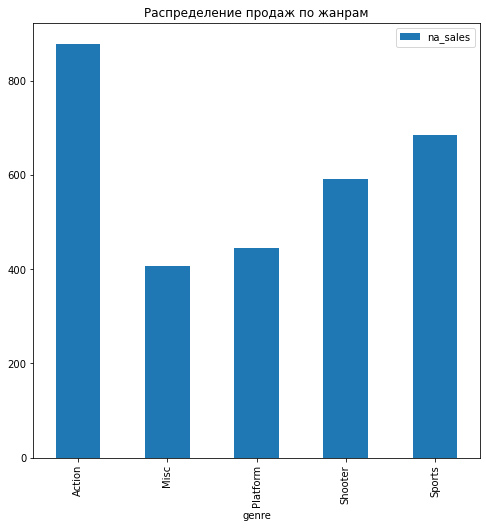

In [ ]:
df_games_sale_genre_NA=df_games.pivot_table(index='genre', values="na_sales", aggfunc='sum')
display(df_games_sale_genre_NA['na_sales'].sort_values(ascending=False).head(5))
TOP_genre_NA=['Action', 'Sports', 'Shooter', 'Platform', 'Misc']
df_games_sale_genre_NA_TOP_5=df_games_sale_genre_NA.query('genre==@TOP_genre_NA').reset_index()
df_games_sale_genre_NA_TOP_5.plot(x='genre', y='na_sales', kind='bar'\
            , title='Распределение продаж по жанрам',figsize=(8, 8))

genre
Action    519.13
Sports    376.79
Shooter   317.34
Racing    236.51
Misc      212.74
Name: eu_sales, dtype: float64

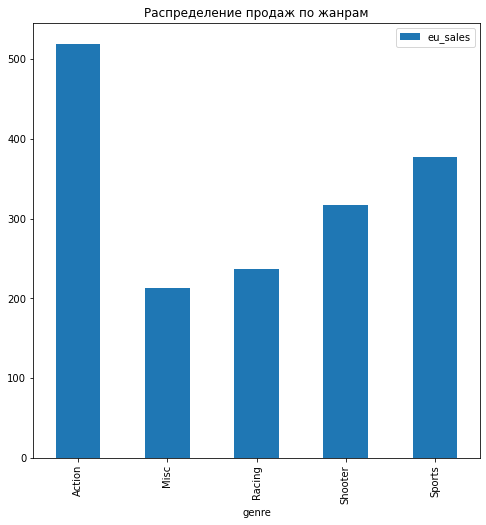

In [ ]:
df_games_sale_genre_EU=df_games.pivot_table(index='genre', values="eu_sales", aggfunc='sum')
display(df_games_sale_genre_EU['eu_sales'].sort_values(ascending=False).head(5))
TOP_genre_EU=['Action', 'Sports', 'Shooter', 'Racing', 'Misc']
df_games_sale_genre_EU_TOP_5=df_games_sale_genre_EU.query('genre==@TOP_genre_EU').reset_index()
df_games_sale_genre_EU_TOP_5.plot(x='genre', y='eu_sales', kind='bar'\
            , title='Распределение продаж по жанрам',figsize=(8, 8))

genre
Role-Playing   355.41
Action         161.43
Sports         135.54
Platform       130.83
Misc           108.11
Name: jp_sales, dtype: float64

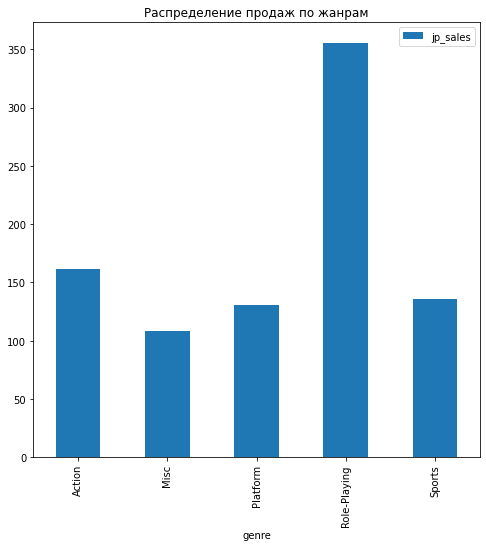

In [ ]:
df_games_sale_genre_JP=df_games.pivot_table(index='genre', values="jp_sales", aggfunc='sum')
display(df_games_sale_genre_JP['jp_sales'].sort_values(ascending=False).head(5))
TOP_genre_JP=['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc']
df_games_sale_genre_JP_TOP_5=df_games_sale_genre_JP.query('genre==@TOP_genre_JP').reset_index()
df_games_sale_genre_JP_TOP_5.plot(x='genre', y='jp_sales', kind='bar'\
            , title='Распределение продаж по жанрам',figsize=(8, 8))

**Промежуточный вывод**
* Предпочтения пользователей в Европе и Америке схожи. Первые места в рейтинге популярности занимают жанры Action, Sport и Shooter  
* В Японии самым популярным жанром является Role-Playing, причем с большим отрывом. Вероятнее всего это связано с особенностями японской культуры. Исследователи даже выделяют ролевые игры западной школы и ролевые игры японской школы (jRPG) (https://ru.wikipedia.org/wiki/Компьютерная_ролевая_игра)

### Определим влияние рейтинга ESRB  на продажи в разных регионах

Выведем расшифровку сокращений для рейтингов
* 'E' - Для детей младшего возраста»
* 'M' - Для взрослых
* 'T' - Подросткам
* 'E10+' - Для всех от 10 лет и старше
* 'K-A' - Kids to Adults
* 'AO' - Только для взрослых
* 'EC' - Для детей младшего возраста
* 'RP' - Рейтинг ожидается

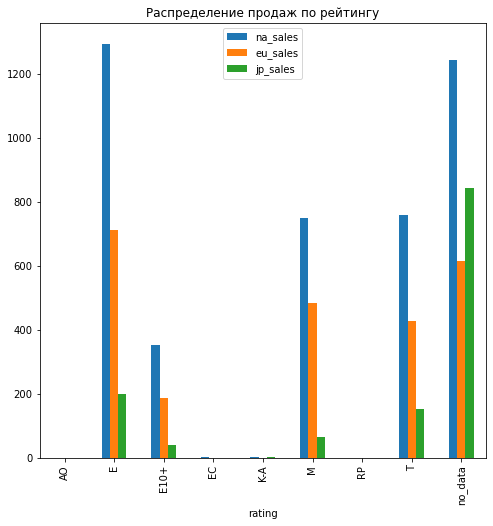

In [ ]:
columns_region=['na_sales', 'eu_sales', 'jp_sales']
df_games_sale_rating_column=df_games.pivot_table(index="rating", values=columns_region, aggfunc='sum').reset_index()
df_games_sale_rating_column.plot(x='rating', y=columns_region, kind='bar', \
                title='Распределение продаж по рейтингу', figsize=(8, 8))

**Промежуточный вывод**
* Игры с разным рейтингом продаются по-разному, но это еще не значит, что влияет сам рейтинг. Возможно просто игр для впринципе производят больше
* В Америке и Европе распределение продаж очень близкое, а для Японии такие данные отсутствуют. Возможно это связано с тем, чтов Японии не так пристально относятся к рейтингам игр, а может у них существуют свои внутрениие рейтинги. Например такой https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization

# ПРОВЕРКА ГИПОТЕЗ

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры)
и Sports (англ. «спортивные соревнования») разные.

### Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сформулируем нулевую гипотезу. **Hо** - Средние пользовательские рейтинги платформ Xbox One и PC равны. **Альтернативная гипотеза** - Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Рассчитаем дисперсии выборок

In [ ]:
df_games_Xbox_One=df_games.query('platform=="XOne"')
df_games_PC=df_games.query('platform=="PC"')

df_games_Xbox_One_variance=np.var(df_games_Xbox_One['user_score'])
df_games_PC_variance=np.var(df_games_PC['user_score'])

print("Дисперсия по платформе Xbox One", df_games_Xbox_One_variance)
print("Дисперсия по платформе PC", df_games_PC_variance)

Дисперсия по платформе Xbox One 1.5664154469012763
Дисперсия по платформе PC 1.8940262534310977


In [ ]:
#зададим критический уровень статистической значимости, alpha=0.05.

#Дисперсии выборок незначительно отличаются, поэтому параметр equal_var установим True

sample_1 = df_games_Xbox_One['user_score']

sample_2 = df_games_PC['user_score']

alpha = 0.05

results = st.ttest_ind(
    sample_1,
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.5341366694379986e-05
Отвергаем нулевую гипотезу


### Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные"

Сформулируем нулевую гипотезу. **Hо** - Средние пользовательские рейтинги жанров Action и Sports равны.
**Альтернативная гипотеза** - Средние пользовательские рейтинги жанров Action и Sports различаются.

Рассчитаем дисперсии выборок

In [ ]:
df_games_Action=df_games.query('genre=="Action"')
df_games_Sports=df_games.query('genre=="Sports"')

df_games_Action_variance=np.var(df_games_Action['user_score'])
df_games_Sports_variance=np.var(df_games_Sports['user_score'])

print("Дисперсия по жанру Action", df_games_Action_variance)
print("Дисперсия по жанру Sports", df_games_Sports_variance)

Дисперсия по жанру Action 1.1327154390144192
Дисперсия по жанру Sports 1.2665978222069072


In [ ]:
#зададим критический уровень статистической значимости, alpha=0.05.

#Дисперсии выборок незначительно отличаются, поэтому параметр equal_var установим True

sample_1 = df_games_Action['user_score']

sample_2 = df_games_Sports['user_score']

alpha = 0.05

results = st.ttest_ind(
    sample_1,
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5342570517131008
Не получилось отвергнуть нулевую гипотезу


**Промежуточный вывод** Для проверки гипотез мы применили метод scipy.stats.ttest_ind, так как этот метод применяется для
проверки гипотезы о равенстве средних двух генеральных совокупностей
* Вероятность получить равные оценки пользователей для платформ Xbox One и PC очень мала. Следовательно говорить о схожести оценок пользователей для этих платформ неверно
* Вероятность получить равные оценки пользователей для платформ Action и Sports очень велика. Следовательно говорить о значимых различиях в оценки пользователей для этих жанров неверно

# ОСНОВНОЙ ВЫВОД:

* Основное влияние на продажи игры оказывает платформа и жанр игры
* В разных регионах популярны разные жанры игр и платформы
* Срок жизни одной платформы ограничен, поэтому лучше продавать игры на растущих рынках. Это платформы PS2-4 и стабильная PC
* Для успешных продаж в Америке и Европе лучше продавать игры платформ X360 (Америка) и PS2-4 жанров Action, Sport и Shooter
* Для успешных продаж в Японии лучше продавать игры платформ PS2-4 жанра Role-Playing, а дальше также Action, Sport и Shooter
* В общем по миру популярными платформамиявляются Wii, NES, GB, DS и X360
* Рейтинги критиков сильнее влияют на продажи игр, чем мнение пользователей, поэтому лучше продавать игры с высокими рейтингами критиков